# 01 - Data Exploration

### Telco Customer Churn dataset.
We will perform initial exploratory data analysis (EDA) to understand the dataset, check data quality, and identify key patterns that my influence churn prediction.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

In [2]:
# Load dataset
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv')

# Basic shape and first look
print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_copy = df.copy()

In [4]:
# Drop unnecessary columns
if 'customerID' in df_copy.columns:
    df_copy.drop(columns=['customerID'], inplace=True)
    print("Dropped 'customerID' column. ")

df_copy.head()

Dropped 'customerID' column. 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Dataset info
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
# 'TotalCharges' - convert to numeric (handle non-numeric as NaN) and fill missing values with median
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')
df_copy['TotalCharges'] = df_copy['TotalCharges'].fillna(df_copy['TotalCharges'].median())

# 'SeniorCitizen' conversion to categorical
df_copy['SeniorCitizen'] = df_copy['SeniorCitizen'].map({0: "No", 1: "Yes"})

print(df_copy.dtypes)

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [7]:
# Statistical summary of numerical features
df_copy.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [8]:
# check for missing values
df_copy.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# check for duplicate rows
df_copy.duplicated().sum()

np.int64(22)

In [10]:
# Drop duplicates
df_copy = df_copy.drop_duplicates()

print("Duplicate rows after: ", df_copy.duplicated().sum)
print("New Shape: ", df_copy.shape)

Duplicate rows after:  <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7021, dtype: bool>
New Shape:  (7021, 20)


C:\Users\fling\AppData\Local\Temp\ipykernel_11136\2290691189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x='Churn', palette='pastel')


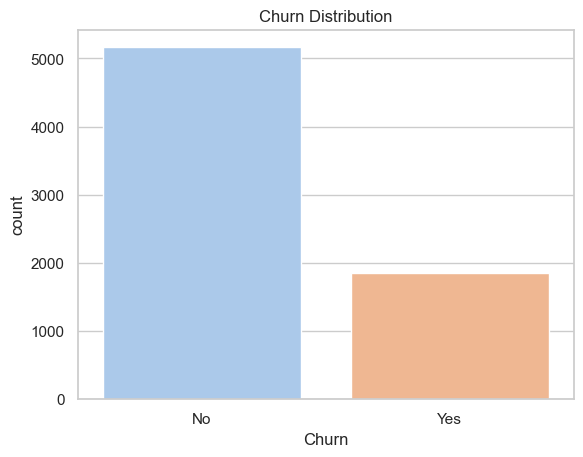

Churn
No     0.735508
Yes    0.264492
Name: proportion, dtype: float64

In [11]:
# Target variable distribution (Churn)
sns.countplot(data=df_copy, x='Churn', palette='pastel')
plt.title('Churn Distribution')
plt.show()

df_copy['Churn'].value_counts(normalize=True)

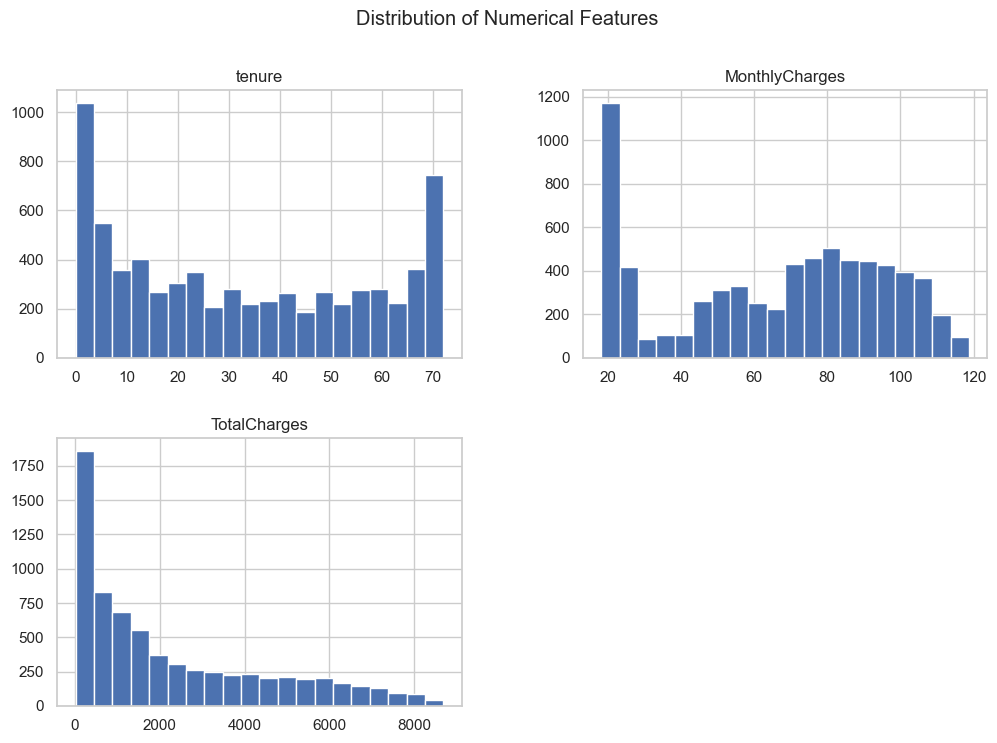

In [12]:
# Histograms for numerical columns
num_cols = df_copy.select_dtypes(include=[np.number]).columns

df_copy[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

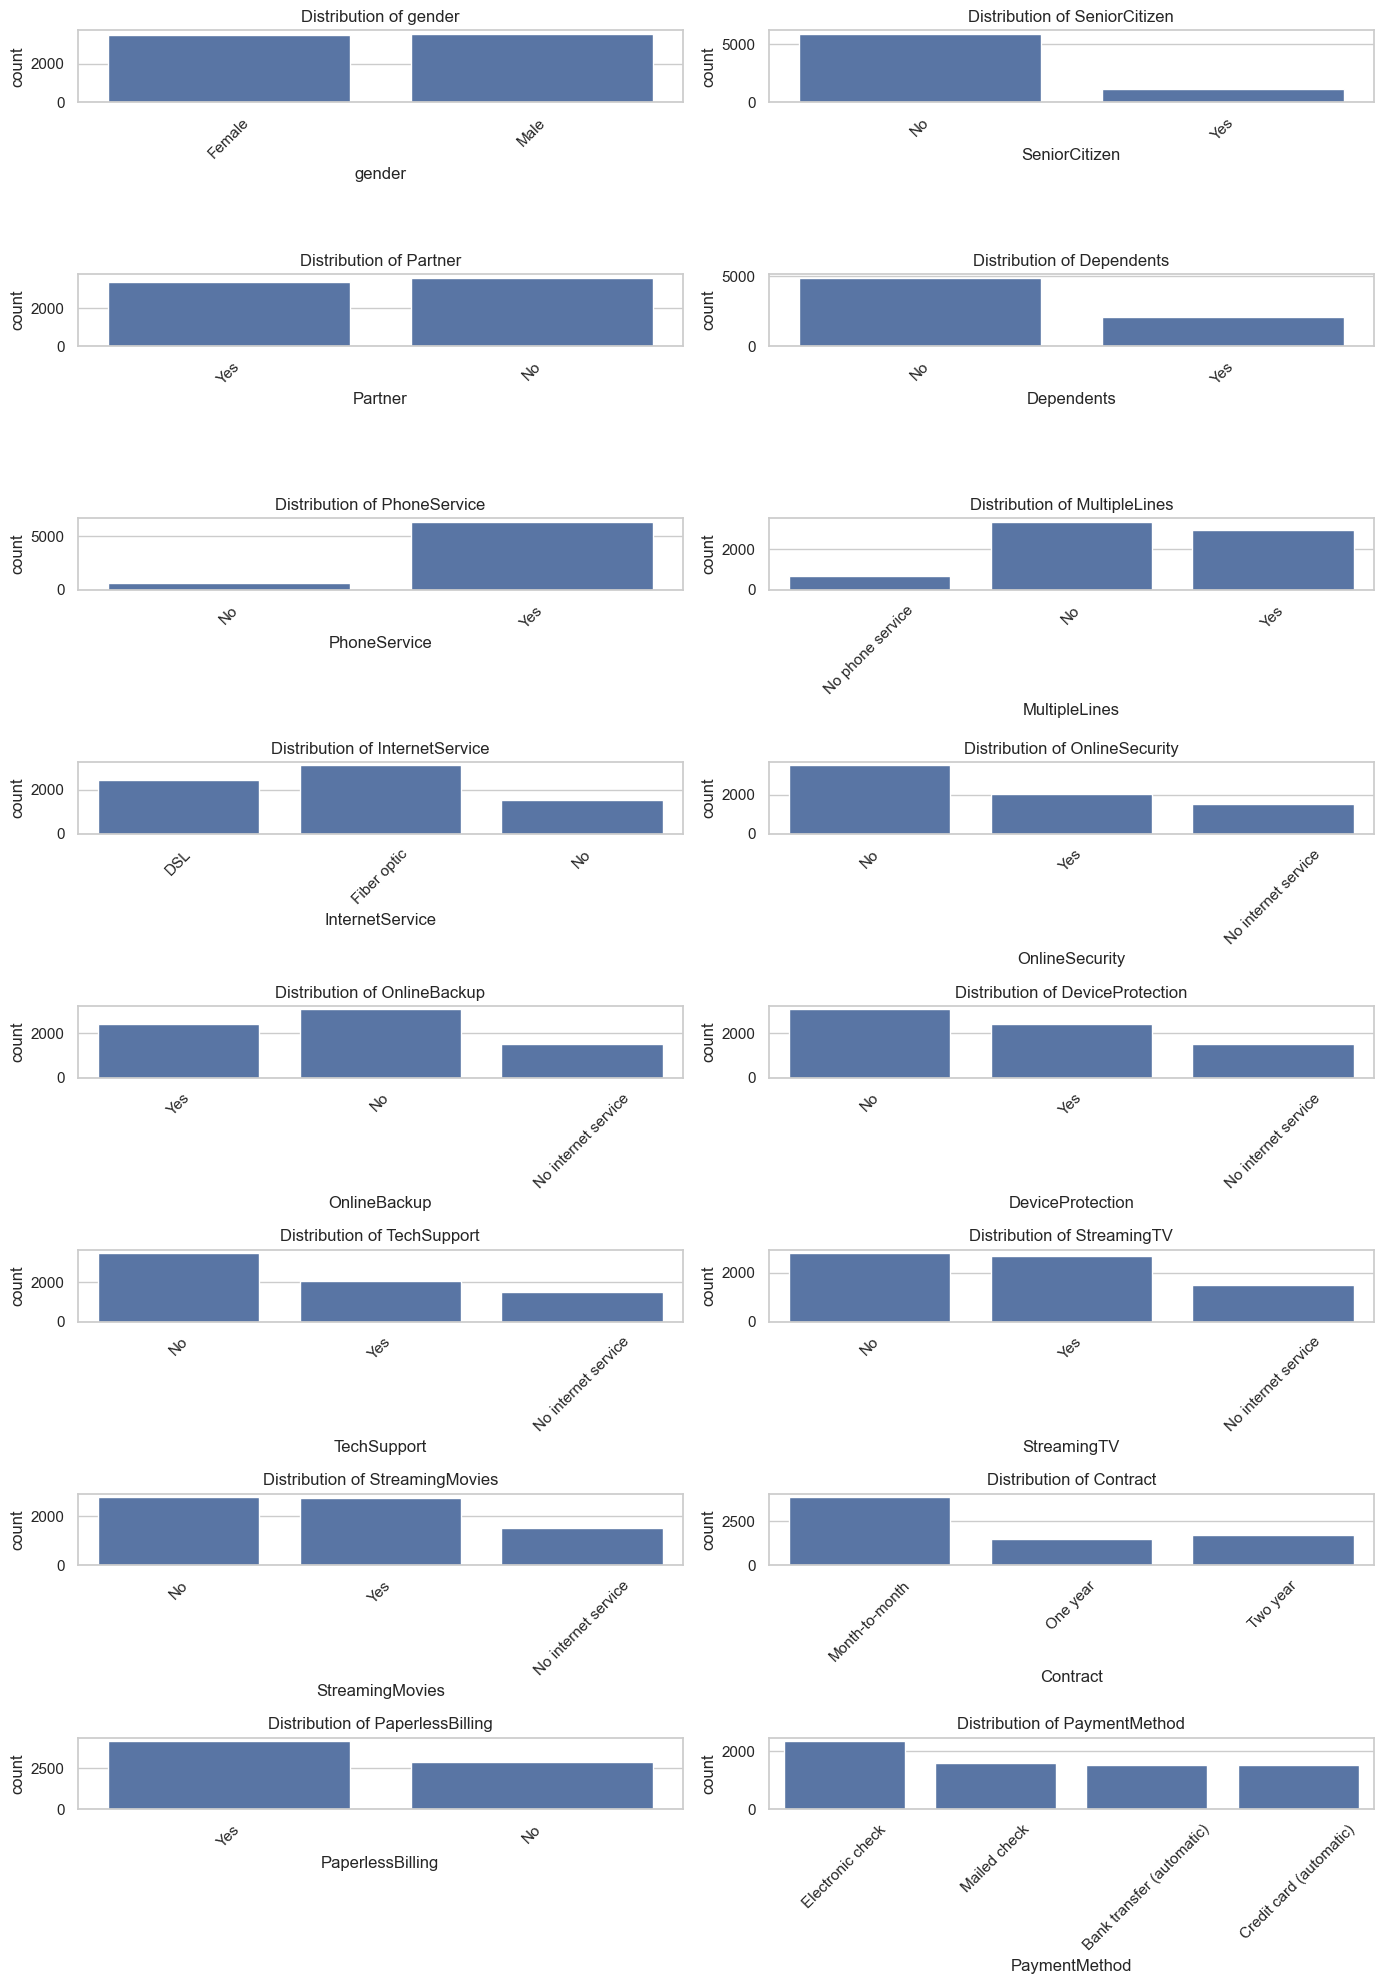

In [13]:
# Countplots for categorical variables
cat_cols = df_copy.select_dtypes(include=['object']).columns.drop('Churn')

fig, axes = plt.subplots(len(cat_cols)//2, 2, figsize=(14,20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df_copy, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

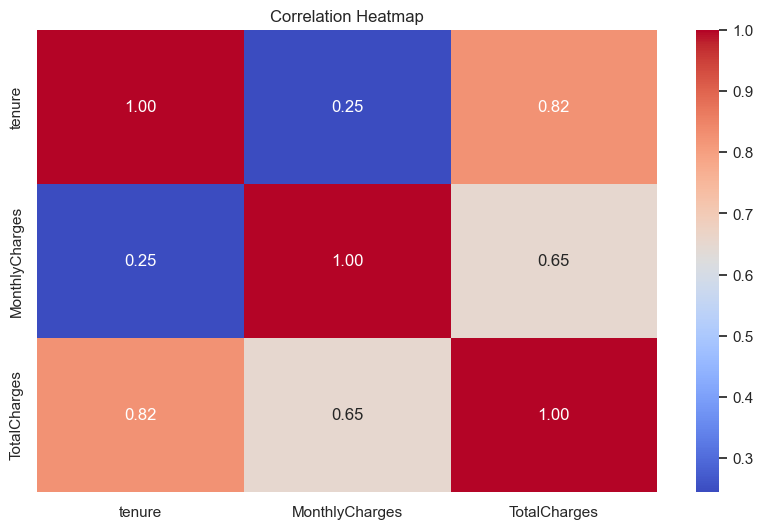

In [14]:
## Correlation heatmap (numerical only)
plt.figure(figsize=(10, 6))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

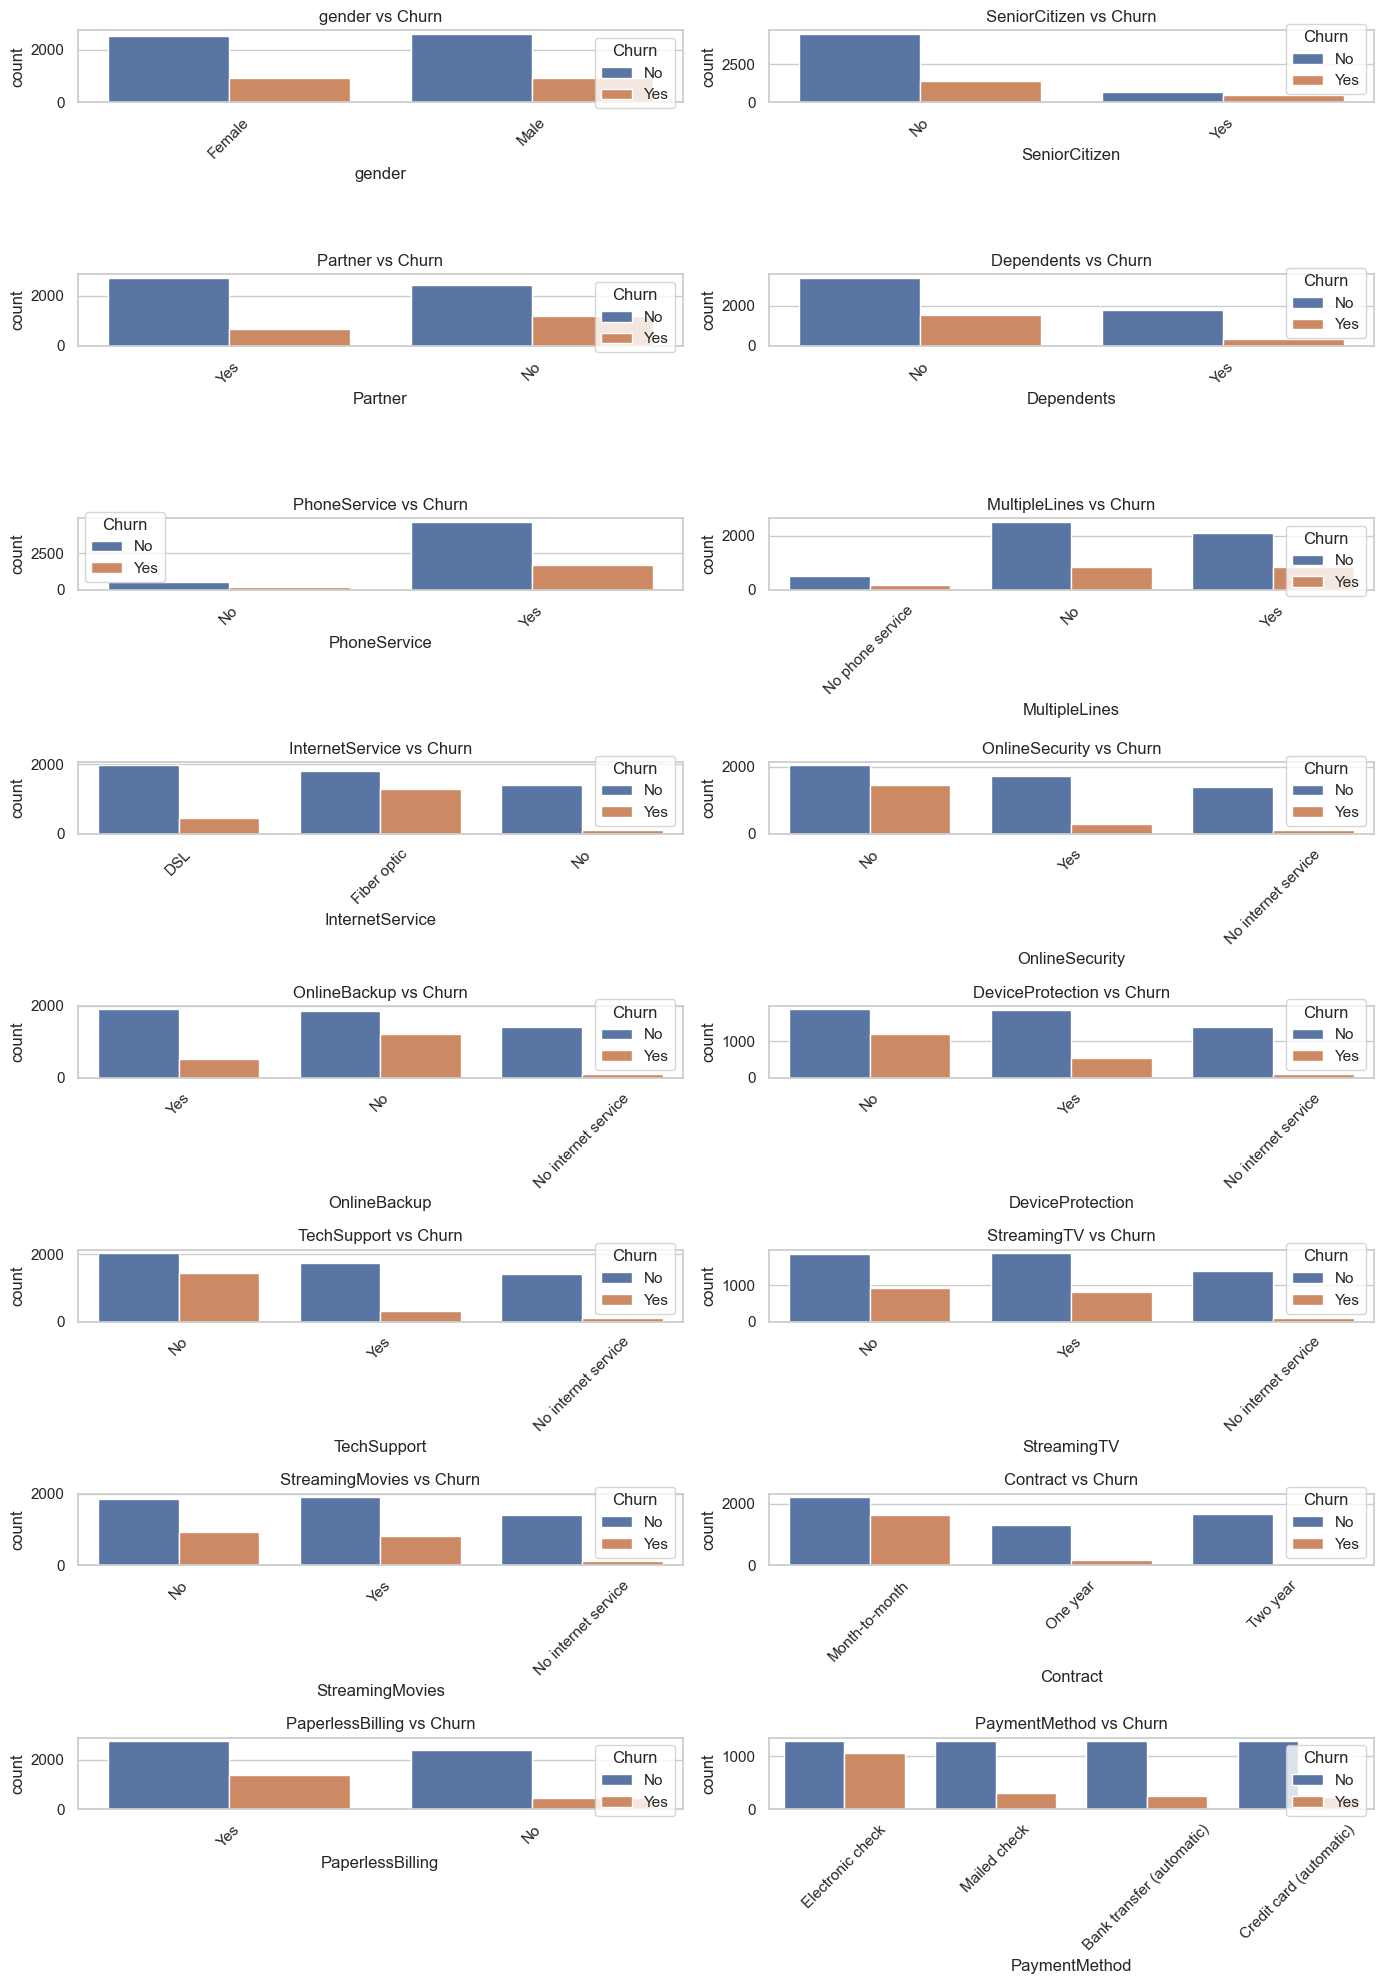

In [15]:
# Churn vs Categorical variables
fig, axes = plt.subplots(len(cat_cols)//2, 2, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Churn', data=df_copy, ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\fling\AppData\Local\Temp\ipykernel_11136\591348889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x='Churn', y=col, palette='Set2')


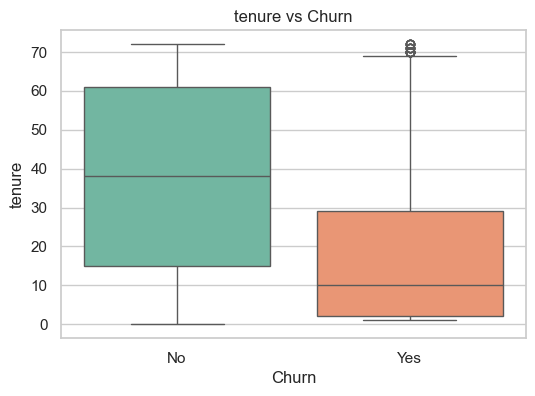

C:\Users\fling\AppData\Local\Temp\ipykernel_11136\591348889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x='Churn', y=col, palette='Set2')


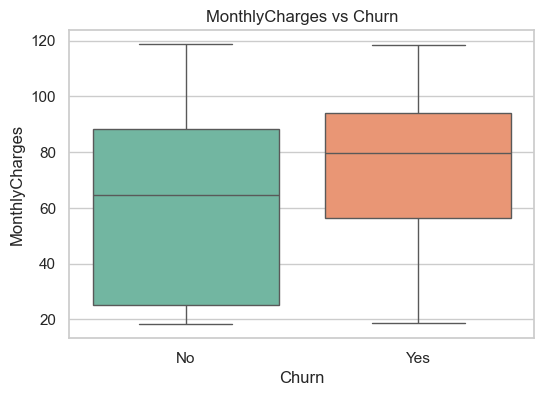

C:\Users\fling\AppData\Local\Temp\ipykernel_11136\591348889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x='Churn', y=col, palette='Set2')


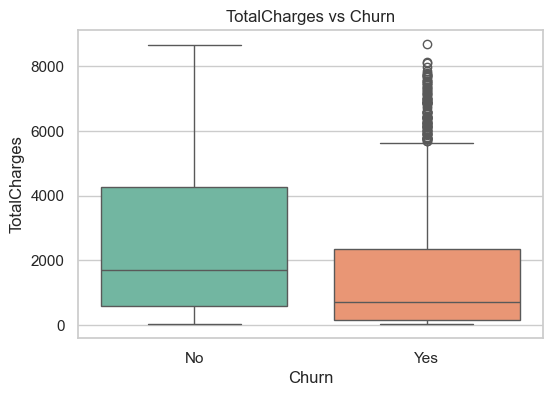

In [16]:
# Boxplots for numerical features vs Churn
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_copy, x='Churn', y=col, palette='Set2')
    plt.title(f"{col} vs Churn")
    plt.show()

In [17]:
# Save cleaned dataset for feature engineering
df_copy.to_csv("../data/processed/cleaned_churn.csv", index=False)

print(" Cleaned dataset saved at: data/processed/cleaned_churn.csv")

 Cleaned dataset saved at: data/processed/cleaned_churn.csv
